In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime as dt
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.00, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -180.00, high = 180.00, size = 1500)
lat_lngs = zip(lats,lngs)

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [7]:
# Create a list for holding the cities.

cities =[]

#Identify the nearest city for each lattitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # check for the city if already exists
    if city not in cities:
        cities.append(city)


In [8]:
# Create an empty list to hold the weather data.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = dt.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"City {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | pankrushikha
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | avanigadda
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | kalmunai
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | umzimvubu
City umzimvubu not found. Skipping...
Processing Record 16 of Set 1 | hailar
Processing Record 17 of Set 1 | redlands
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | rawson
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | vao
Processing Record 23 of Set 1 | port elizabeth
Processing Recor

Processing Record 34 of Set 4 | azimur
City azimur not found. Skipping...
Processing Record 35 of Set 4 | parana
Processing Record 36 of Set 4 | san patricio
Processing Record 37 of Set 4 | sumenep
Processing Record 38 of Set 4 | progreso
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | chum phae
Processing Record 41 of Set 4 | baykit
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | nizwa
Processing Record 45 of Set 4 | stamsund
City stamsund not found. Skipping...
Processing Record 46 of Set 4 | gambela
Processing Record 47 of Set 4 | aqtobe
Processing Record 48 of Set 4 | nizhniy tsasuchey
Processing Record 49 of Set 4 | san jose
Processing Record 50 of Set 4 | saint-augustin
Processing Record 1 of Set 5 | sweetwater
Processing Record 2 of Set 5 | lake cowichan
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | micomeseng
Processing Record 5 of Set 5 | hambantota
P

Processing Record 20 of Set 8 | nizhnyaya tura
Processing Record 21 of Set 8 | lerwick
Processing Record 22 of Set 8 | innisfail
Processing Record 23 of Set 8 | san quintin
Processing Record 24 of Set 8 | toliary
City toliary not found. Skipping...
Processing Record 25 of Set 8 | poum
Processing Record 26 of Set 8 | grimari
City grimari not found. Skipping...
Processing Record 27 of Set 8 | praya
Processing Record 28 of Set 8 | kurtalan
Processing Record 29 of Set 8 | saint-louis
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | shache
Processing Record 32 of Set 8 | acapulco
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | monrovia
Processing Record 35 of Set 8 | sentyabrskiy
City sentyabrskiy not found. Skipping...
Processing Record 36 of Set 8 | mana
Processing Record 37 of Set 8 | omboue
Processing Record 38 of Set 8 | kudahuvadhoo
Processing Record 39 of Set 8 | udarnyy
Processing Record 40 of Set 8 | biak
Processing Record 41 of Set

Processing Record 4 of Set 12 | ushibuka
Processing Record 5 of Set 12 | linda
Processing Record 6 of Set 12 | apango
Processing Record 7 of Set 12 | kralendijk
Processing Record 8 of Set 12 | yuza
Processing Record 9 of Set 12 | kadykchan
City kadykchan not found. Skipping...
Processing Record 10 of Set 12 | thunder bay
Processing Record 11 of Set 12 | kwinana
Processing Record 12 of Set 12 | yeppoon
Processing Record 13 of Set 12 | sciacca
Processing Record 14 of Set 12 | casma
Processing Record 15 of Set 12 | santa isabel
Processing Record 16 of Set 12 | pa sang
Processing Record 17 of Set 12 | benghazi
Processing Record 18 of Set 12 | turukhansk
Processing Record 19 of Set 12 | dali
Processing Record 20 of Set 12 | zhigansk
Processing Record 21 of Set 12 | borba
Processing Record 22 of Set 12 | upata
Processing Record 23 of Set 12 | tashla
Processing Record 24 of Set 12 | petropavlovskoye
Processing Record 25 of Set 12 | itacoatiara
Processing Record 26 of Set 12 | indian head
Proc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,45.01,25,100,17.27,US,2022-03-23 13:38:42
1,Cherskiy,68.7500,161.3000,1.31,100,63,1.07,RU,2022-03-23 13:38:42
2,Kaitangata,-46.2817,169.8464,57.09,96,5,3.53,NZ,2022-03-23 13:38:43
3,Pankrushikha,53.8319,80.3406,23.65,94,100,18.21,RU,2022-03-23 13:38:43
4,Fortuna,40.5982,-124.1573,49.93,96,100,0.00,US,2022-03-23 13:38:43
5,Nome,64.5011,-165.4064,12.27,44,0,4.61,US,2022-03-23 13:38:44
6,Avanigadda,16.0215,80.9181,83.05,74,88,5.59,IN,2022-03-23 13:38:44
7,Kapaa,22.0752,-159.3190,72.19,86,75,17.27,US,2022-03-23 13:38:44
8,Punta Arenas,-53.1500,-70.9167,42.91,52,0,11.50,CL,2022-03-23 13:38:44
9,Castro,-24.7911,-50.0119,73.35,62,100,9.06,BR,2022-03-23 13:38:45


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-03-19 19:44:17,64.3833,-173.3000,2.28,71,1,2.98
1,Hithadhoo,MV,2022-03-19 19:51:40,-0.6000,73.0833,83.52,71,8,17.00
2,Kruisfontein,ZA,2022-03-19 19:51:40,-34.0033,24.7314,68.88,95,0,4.45
3,Energetik,RU,2022-03-19 19:51:41,51.7445,58.7934,4.77,99,83,5.48
4,Constitucion,CL,2022-03-19 19:51:41,-35.3333,-72.4167,67.48,48,100,14.47
...,...,...,...,...,...,...,...,...,...
522,Odweyne,SO,2022-03-19 20:05:30,9.4092,45.0640,74.52,41,6,4.45
523,Kuching,MY,2022-03-19 20:00:33,1.5500,110.3333,75.42,94,40,0.00
524,San Roque,ES,2022-03-19 20:05:30,36.2107,-5.3842,57.38,84,46,20.11
525,Sao Paulo De Olivenca,BR,2022-03-19 20:05:31,-3.3783,-68.8725,76.68,93,97,4.21


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

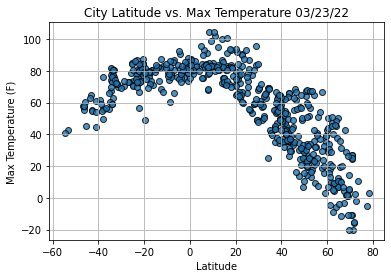

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

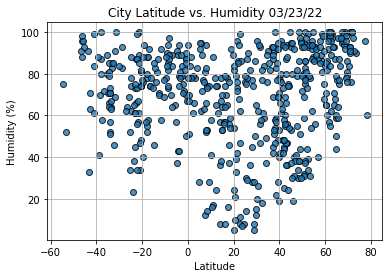

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

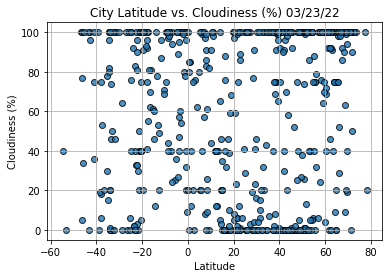

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

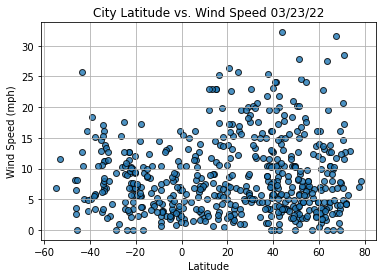

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    return r_value

In [58]:
index13 = city_data_df.loc[13]
index13 

City               Severo-Kurilsk
Country                        RU
Date          2022-03-23 13:38:46
Lat                       50.6789
Lng                       156.125
Max Temp                    27.72
Humidity                       69
Cloudiness                     26
Wind Speed                  12.75
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
537     True
538     True
539     True
540     True
541     True
Name: Lat, Length: 542, dtype: bool

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-03-23 13:38:42,42.0970,-79.2353,45.01,25,100,17.27
1,Cherskiy,RU,2022-03-23 13:38:42,68.7500,161.3000,1.31,100,63,1.07
3,Pankrushikha,RU,2022-03-23 13:38:43,53.8319,80.3406,23.65,94,100,18.21
4,Fortuna,US,2022-03-23 13:38:43,40.5982,-124.1573,49.93,96,100,0.00
5,Nome,US,2022-03-23 13:38:44,64.5011,-165.4064,12.27,44,0,4.61
...,...,...,...,...,...,...,...,...,...
537,Rexburg,US,2022-03-23 13:49:55,43.8260,-111.7897,29.71,74,0,3.44
538,Meulaboh,ID,2022-03-23 13:52:41,4.1363,96.1285,79.77,83,62,4.61
539,Najran,SA,2022-03-23 13:48:21,17.4924,44.1277,93.85,16,46,19.91
540,Ginda,IN,2022-03-23 13:52:42,30.6945,78.4932,58.82,26,4,5.03


In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-03-23 13:38:42,42.0970,-79.2353,45.01,25,100,17.27
1,Cherskiy,RU,2022-03-23 13:38:42,68.7500,161.3000,1.31,100,63,1.07
3,Pankrushikha,RU,2022-03-23 13:38:43,53.8319,80.3406,23.65,94,100,18.21
4,Fortuna,US,2022-03-23 13:38:43,40.5982,-124.1573,49.93,96,100,0.00
5,Nome,US,2022-03-23 13:38:44,64.5011,-165.4064,12.27,44,0,4.61


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [63]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-03-23 13:38:42,42.0970,-79.2353,45.01,25,100,17.27
1,Cherskiy,RU,2022-03-23 13:38:42,68.7500,161.3000,1.31,100,63,1.07
3,Pankrushikha,RU,2022-03-23 13:38:43,53.8319,80.3406,23.65,94,100,18.21
4,Fortuna,US,2022-03-23 13:38:43,40.5982,-124.1573,49.93,96,100,0.00
5,Nome,US,2022-03-23 13:38:44,64.5011,-165.4064,12.27,44,0,4.61


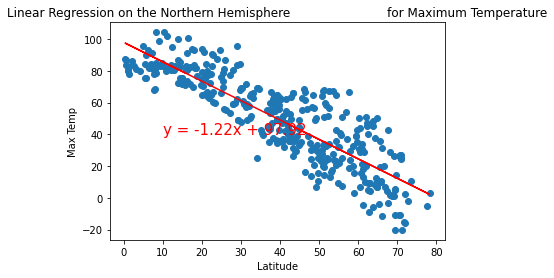

r_value is -0.8640767468506919


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
print(f"r_value is {r_value}")

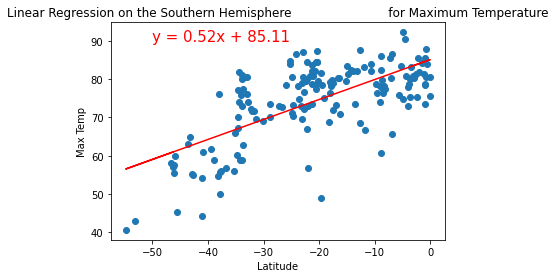

r_value is 0.6762953421444049


In [66]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
print(f"r_value is {r_value}")

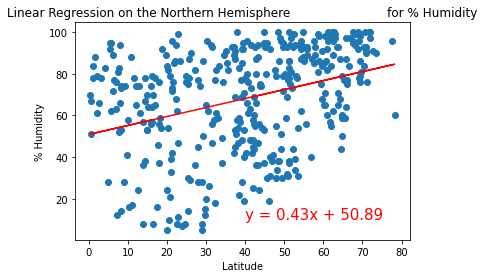

r_value is 0.34046369235861146


In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
print(f"r_value is {r_value}")

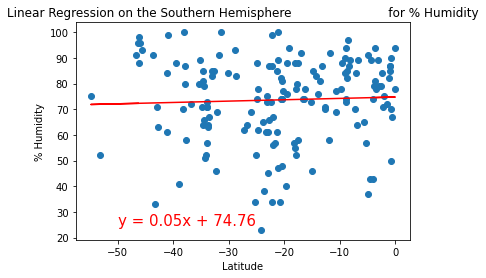

r_value is 0.043082229179424385


In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))
print(f"r_value is {r_value}")

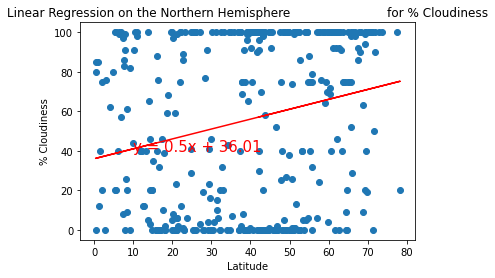

r_value is 0.23221600927610156


In [69]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))
print(f"r_value is {r_value}")

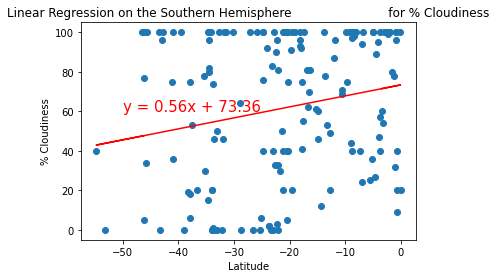

r_value is 0.20241518901229974


In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
print(f"r_value is {r_value}")

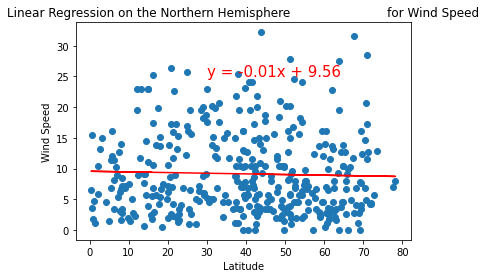

r_value is -0.03185305617896415


In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,25))
print(f"r_value is {r_value}")

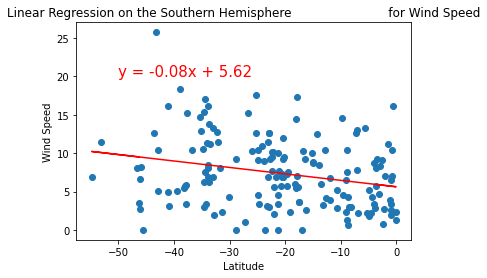

r_value is -0.24872506676163253


In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
r_value = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
print(f"r_value is {r_value}")